In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = yf.download('MSFT', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.479111,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,214.686005,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.119324,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.070251,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.380630,22956200
...,...,...,...,...,...,...
2022-08-15,291.000000,294.179993,290.109985,293.470001,292.848389,18085700
2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900
2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400


In [5]:
df['SMA'] = df.Close.rolling(window=20).mean()

In [6]:
df['stddev'] = df.Close.rolling(window=20).std()

In [7]:
df['Upper'] = df.SMA + 2* df.stddev
df['Lower'] = df.SMA - 2* df.stddev 

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower
Date,,,,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.479111,37130100,NaN,NaN,NaN,NaN
2021-01-05,217.259995,218.520004,215.699997,217.899994,214.686005,23823000,NaN,NaN,NaN,NaN
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.119324,35930700,NaN,NaN,NaN,NaN
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.070251,27694500,NaN,NaN,NaN,NaN
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.380630,22956200,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08-15,291.000000,294.179993,290.109985,293.470001,292.848389,18085700,275.482997,12.224691,299.932379,251.033615
2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900,277.141997,12.197161,301.536319,252.747675
2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400,278.594498,12.061876,302.718249,254.470746


In [9]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [10]:
df = df.dropna()

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
Date,,,,,,,,,,,,
2021-02-01,235.059998,242.500000,232.429993,239.649994,236.115219,33314200,222.858998,8.723604,240.306207,205.411789,False,False
2021-02-02,241.300003,242.309998,238.690002,239.509995,235.977264,25916300,223.949998,9.382671,242.715339,205.184656,False,False
2021-02-03,239.570007,245.089996,239.259995,243.000000,239.415802,27158100,225.204998,10.175966,245.556929,204.853067,False,False
2021-02-04,242.660004,243.240005,240.369995,242.009995,238.440399,25296100,226.692998,10.356153,247.405304,205.980691,False,False
2021-02-05,242.229996,243.279999,240.419998,242.199997,238.627579,18054800,227.888498,10.709122,249.306741,206.470255,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,291.000000,294.179993,290.109985,293.470001,292.848389,18085700,275.482997,12.224691,299.932379,251.033615,False,False
2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900,277.141997,12.197161,301.536319,252.747675,False,False
2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400,278.594498,12.061876,302.718249,254.470746,False,False


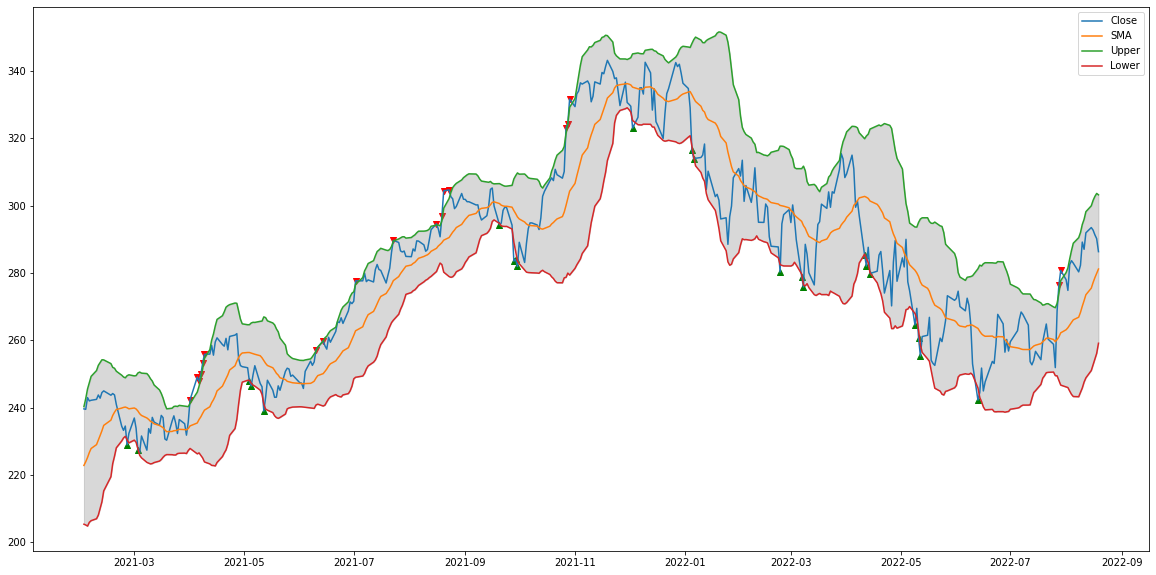

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker = '^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker = 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [13]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buys.append(i)
      open_pos = True
  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sells.append(i)
      open_pos = False



In [16]:
buys

[17, 64, 160, 213]

In [17]:
sells

[42, 90, 187, 375]

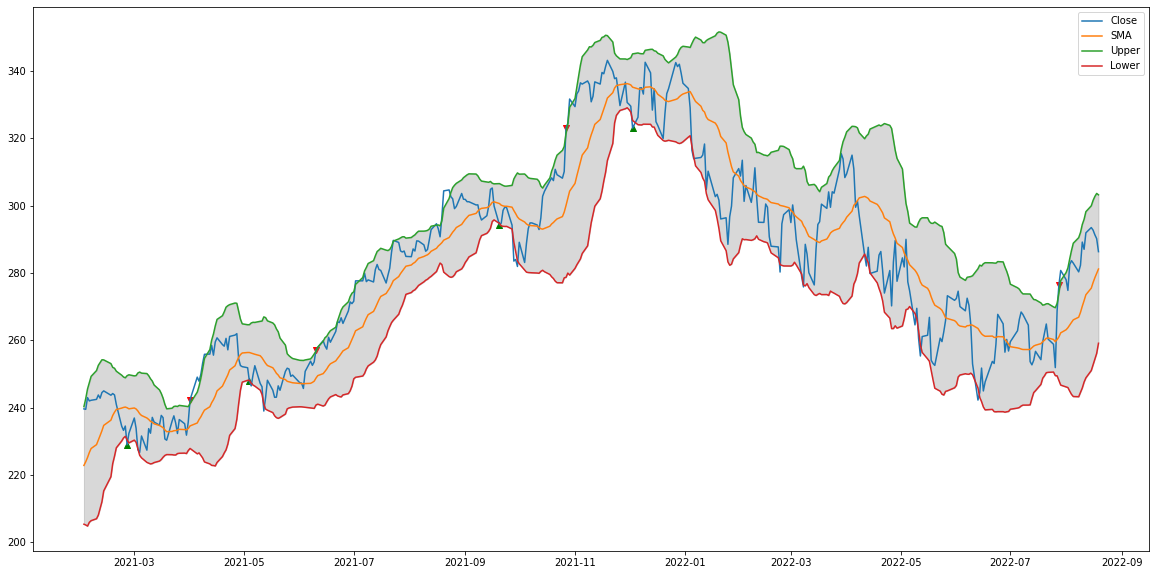

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker = '^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker = 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [19]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [20]:
merged

,Close,Close
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013
2021-12-03,323.010010,NaN
2022-07-28,NaN,276.410004


In [21]:
merged.columns = ['Buys', 'Sells']

In [22]:
merged

,Buys,Sells
Date,,
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013
2021-12-03,323.010010,NaN
2022-07-28,NaN,276.410004


In [23]:
totalprofit = merged.shift(-1).Sells - merged.Buys

In [24]:
totalprofit

Date
2021-02-25    13.360001
2021-04-01          NaN
2021-05-04     9.449997
2021-06-10          NaN
2021-09-20    28.870026
2021-10-27          NaN
2021-12-03   -46.600006
2022-07-28          NaN
dtype: float64

In [25]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [26]:
relprofits

Date
2021-02-25    0.058343
2021-04-01         NaN
2021-05-04    0.038137
2021-06-10         NaN
2021-09-20    0.098097
2021-10-27         NaN
2021-12-03   -0.144268
2022-07-28         NaN
dtype: float64

In [27]:
relprofits.mean()

0.01257738959757813